In [1]:
import itertools
import sys, os

from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from sklearn.metrics import classification_report, accuracy_score
#import sklearn.metrics as metrics
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import auc

from scipy.optimize import least_squares
from scipy.optimize import curve_fit
from scipy import stats

In [2]:
import pysam

In [3]:
%load_ext autoreload
%autoreload 2
import sep_lib as sep

In [4]:
pd.set_option('display.max_columns', 500)
ann_df = pd.read_csv('data/MIT9313.txt', sep='\t')
ann_df = sep.add_useful_columns_to_annotation_df(ann_df)
small_ann_df = ann_df.loc[ann_df.gene_id == 'PMIT9313_1600']
samfile = pysam.AlignmentFile("data/SRR3334788.sorted.bam", "rb")
contig = 'BX548175.1'


In [16]:
small_ann_df = ann_df.loc[ann_df.gene_id == 'PMIT9313_1600']
cover_df = sep.create_cover_df(small_ann_df, samfile, contig)

peg_as 1272188 1272346
peg_as 1272188 1272346
inter_sense 1272346 1272413
inter_sense 1272346 1272413


In [17]:
cover_df.dtypes

contig_id            object
location             object
type                 object
x                     int64
inter_sense           int64
peg_sense             int64
peg_as                int64
rna_sense             int64
rna_as                int64
reads                 int64
reads_as              int64
overflow_reads        int64
overflow_reads_as     int64
dtype: object

In [18]:
cover_df.columns

Index(['contig_id', 'location', 'type', 'x', 'inter_sense', 'peg_sense',
       'peg_as', 'rna_sense', 'rna_as', 'reads', 'reads_as', 'overflow_reads',
       'overflow_reads_as'],
      dtype='object')

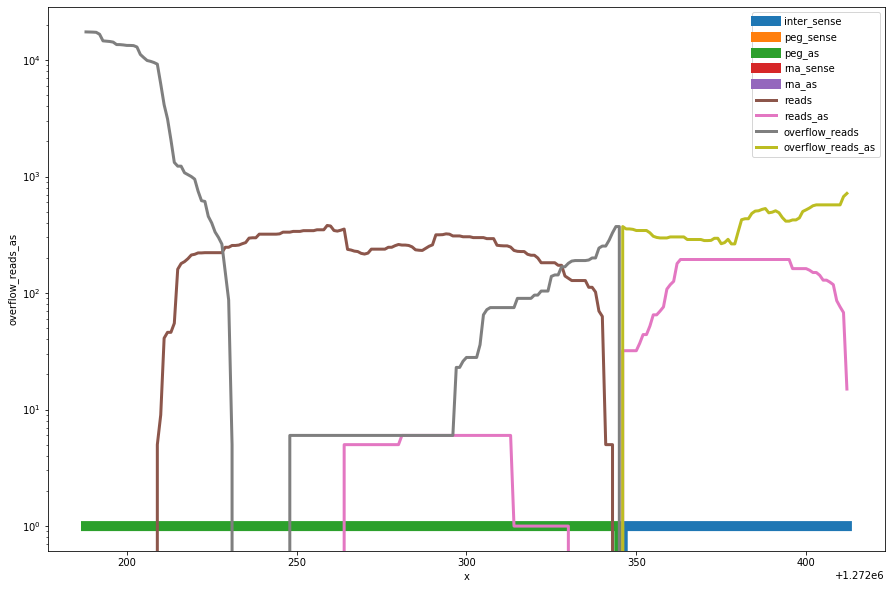

In [19]:
plt.figure(figsize=(15,10))
for c in ['inter_sense', 'peg_sense',
       'peg_as', 'rna_sense', 'rna_as',]:
    sns.lineplot(x=cover_df.x, y=cover_df[c], label=c, linewidth=10)
for c in [ 'reads', 'reads_as', 'overflow_reads',
       'overflow_reads_as']:
    sns.lineplot(x=cover_df.x, y=cover_df[c], label=c, linewidth=3)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1,1))

In [9]:
ann_df.columns

Index(['contig_id', 'gene_id', 'feature_id', 'type', 'location', 'start',
       'stop', 'strand', 'function', 'aliases', 'figfam', 'evidence_codes',
       'nucleotide_sequence', 'aa_sequence', 'min_idx', 'max_idx',
       'inter_stop_idx', 'inter_length', 'gene_length', 'gene_is_reversed'],
      dtype='object')

In [10]:
ann_df.loc[ann_df.type == 'rna', ['gene_id', 'function', 'gene_length' ]]

,gene_id,function,gene_length
45,NaN,tRNA-Gly-CCC,71
93,NaN,tRNA-Gly-GCC,71
211,NaN,Small Subunit Ribosomal RNA; ssuRNA; SSU rRNA,1464
212,NaN,tRNA-Ile-GAT,73
213,NaN,tRNA-Ala-TGC,72
215,NaN,Large Subunit Ribosomal RNA; lsuRNA; LSU rRNA,2876
216,NaN,5S RNA,118
234,NaN,tRNA-Thr-GGT,71
235,NaN,tRNA-Tyr-GTA,81
366,NaN,tRNA-Ser-CGA,84


In [11]:
small_ann_df = ann_df.loc[ann_df.function == '5S RNA']

In [12]:
small_ann_df

,contig_id,gene_id,feature_id,type,location,start,stop,strand,function,aliases,figfam,evidence_codes,nucleotide_sequence,aa_sequence,min_idx,max_idx,inter_stop_idx,inter_length,gene_length,gene_is_reversed
216,MIT9313,NaN,fig|1218.91.rna.7,rna,MIT9313_214141_214259,214141,214259,+,5S RNA,NaN,NaN,NaN,tcctggtgttcatggcgatgtggaaccactccgatccatctcgaac...,NaN,214141,214259,214366.0,107.0,118,False
2247,MIT9313,NaN,fig|1218.91.rna.32,rna,MIT9313_1748347_1748229,1748347,1748229,-,5S RNA,NaN,NaN,NaN,tcctggtgttcatggcgatgtggaaccactccgatccatctcgaac...,NaN,1748229,1748347,1748454.0,107.0,118,True


In [13]:
cover_df = sep.create_cover_df(small_ann_df, samfile, contig)

rna_as 1748229 1748347
rna_as 1748229 1748347
rna_sense 214141 214259
inter_sense 1748347 1748454
inter_sense 1748347 1748454
inter_sense 214259 214366


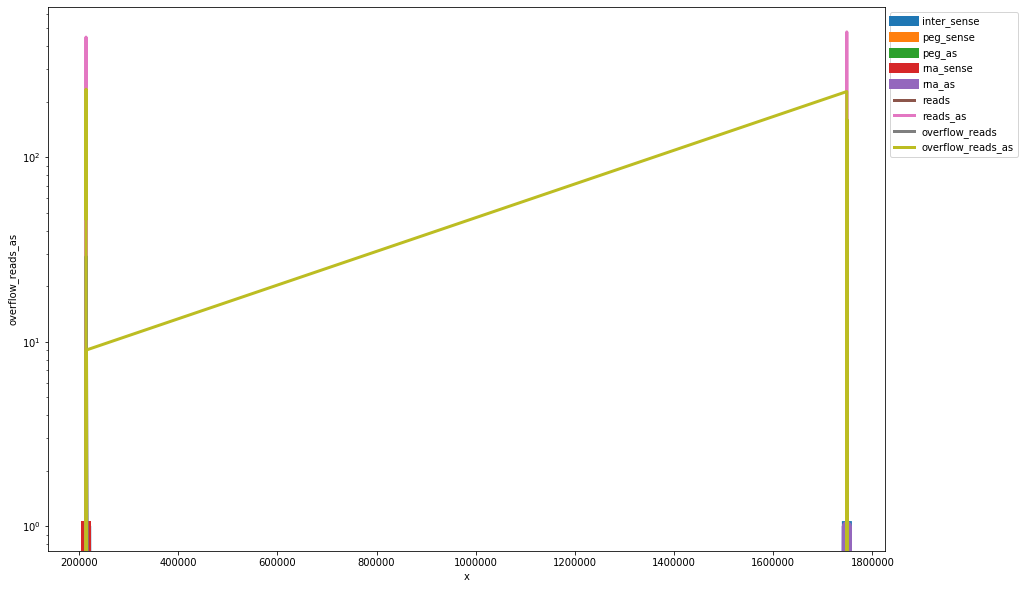

In [15]:
plt.figure(figsize=(15,10))
for c in ['inter_sense', 'peg_sense',
       'peg_as', 'rna_sense', 'rna_as',]:
    sns.lineplot(x=cover_df.x, y=cover_df[c], label=c, linewidth=10)
for c in [ 'reads', 'reads_as', 'overflow_reads',
       'overflow_reads_as']:
    sns.lineplot(x=cover_df.x, y=cover_df[c], label=c, linewidth=3)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1,1))

In [29]:
ann_df.gene_id.isna().sum()

51